In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))
print(train_data[0])
len(train_data[0]), len(train_data[1])

2.17.1
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training entries: 25000, labels: 25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113,

(218, 189)

In [2]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

decode_review(train_data[0])
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)
len(train_data[0]), len(train_data[1])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(256, 256)

In [3]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [5]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [6]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - acc: 0.5673 - loss: 0.6908 - val_acc: 0.6559 - val_loss: 0.6789
Epoch 2/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.6843 - loss: 0.6718 - val_acc: 0.7256 - val_loss: 0.6531
Epoch 3/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.7373 - loss: 0.6402 - val_acc: 0.7591 - val_loss: 0.6143
Epoch 4/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - acc: 0.7716 - loss: 0.5961 - val_acc: 0.7707 - val_loss: 0.5685
Epoch 5/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.7991 - loss: 0.5423 - val_acc: 0.8116 - val_loss: 0.5152
Epoch 6/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.8281 - loss: 0.4877 - val_acc: 0.8254 - val_loss: 0.4668
Epoch 7/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.8431 - loss: 0.4429 - val_acc: 0.8431 - val_loss: 0.4271
Epoch 8/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - acc: 0.8643 - loss: 0.3968 - val_acc: 0.8500 - val_loss: 0.3960
Epoch 9/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.8741

In [7]:
results = model.evaluate(test_data, test_labels)

print(results)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8760 - loss: 0.3091
[0.3146018087863922, 0.8751599788665771]


In [8]:
history_dict = history.history
history_dict.keys()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

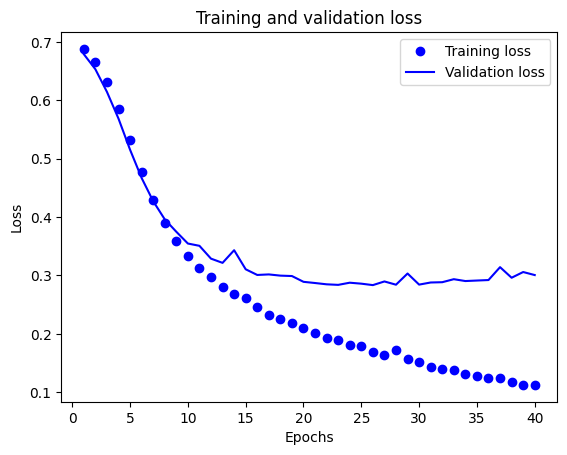

In [9]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

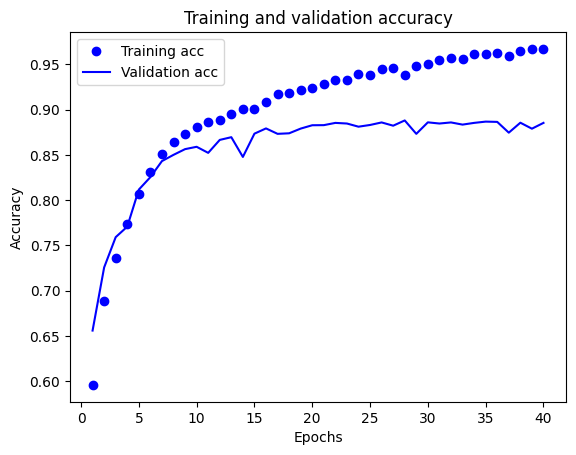

In [10]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()